In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

## Loading the Boston House Pricing Dataset 

In [4]:
boston_df = pd.read_csv("HousingData.csv")

In [5]:
boston_df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [19]:
boston_df.head(20)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87   NaN  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87   NaN  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509    5  311   
13  0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075    4  307   
14  0.63796   0.0   8.14   NaN  0.538  6.096   84.5  4.4619    4  307   
15  0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986    4  307   
16  1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986    4  307   
17  0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579    4  307   
18  0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965    4  307   
19  0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965    4  307   

    PTRATIO       B  LSTAT  MEDV  
0      15.3  396.90   4.98  24.0  
1      17.8  396.90   9.14  21.6  
2      17.8  392.83   4.03  34.7  
3      18.7  394.63   2.94  33.4  
4      18.7  396.90    NaN  36.2  
5      18.7  394.12   5.21  28.7  
6      15.2  395.60  12.43  22.9  
7      15.2  396.90  19.15  27.1  
8      15.2  386.63  29.93  16.5  
9      15.2  386.71  17.10  18.9  
10     15.2  392.52  20.45  15.0  
11     15.2  396.90  13.27  18.9  
12     15.2  390.50  15.71  21.7  
13     21.0  396.90   8.26  20.4  
14     21.0  380.02  10.26  18.2  
15     21.0  395.62   8.47  19.9  
16     21.0  386.85   6.58  23.1  
17     21.0  386.75  14.67  17.5  
18     21.0  288.99  11.69  20.2  
19     21.0  390.95  11.28  18.2

In [22]:
boston_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select only the columns that need imputation
cols_to_impute = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Initialize the IterativeImputer
# The initial strategy is 'mean', and it uses a BayesianRidgeEstimator by default.
imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit and transform the columns
boston_df[cols_to_impute] = imputer.fit_transform(boston_df[cols_to_impute])

# Note: After MICE, the 'CHAS' column (which is binary) 
# will have decimal values, so you would typically round it back to 0 or 1.
boston_df['CHAS'] = np.round(boston_df['CHAS'])

In [24]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory  Data Analysis

### Correlation

In [27]:
boston_df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.198880  0.407594 -0.055806  0.420052 -0.221969  0.356057   
ZN      -0.198880  1.000000 -0.545386 -0.038648 -0.519726  0.317889 -0.576159   
INDUS    0.407594 -0.545386  1.000000  0.054177  0.757726 -0.395422  0.652527   
CHAS    -0.055806 -0.038648  0.054177  1.000000  0.070867  0.106797  0.077956   
NOX      0.420052 -0.519726  0.757726  0.070867  1.000000 -0.302188  0.728261   
RM      -0.221969  0.317889 -0.395422  0.106797 -0.302188  1.000000 -0.247061   
AGE      0.356057 -0.576159  0.652527  0.077956  0.728261 -0.247061  1.000000   
DIS     -0.376252  0.656462 -0.708468 -0.092318 -0.769230  0.205246 -0.744013   
RAD      0.619509 -0.312696  0.596517 -0.003339  0.611441 -0.209847  0.455668   
TAX      0.577669 -0.316100  0.720338 -0.035822  0.668023 -0.292048  0.507393   
PTRATIO  0.288315 -0.400445  0.380983 -0.109451  0.188933 -0.355501  0.266398   
B       -0.379563  0.175438 -0.355620  0.050608 -0.380051  0.128069 -0.279730   
LSTAT    0.457956 -0.417908  0.602761 -0.052645  0.591008 -0.607736  0.613403   
MEDV    -0.391733  0.368204 -0.487675  0.183844 -0.427321  0.695360 -0.391695   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.376252  0.619509  0.577669  0.288315 -0.379563  0.457956 -0.391733  
ZN       0.656462 -0.312696 -0.316100 -0.400445  0.175438 -0.417908  0.368204  
INDUS   -0.708468  0.596517  0.720338  0.380983 -0.355620  0.602761 -0.487675  
CHAS    -0.092318 -0.003339 -0.035822 -0.109451  0.050608 -0.052645  0.183844  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.591008 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.607736  0.695360  
AGE     -0.744013  0.455668  0.507393  0.266398 -0.279730  0.613403 -0.391695  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.499946  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.489179 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543793 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.375684 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.368969  0.333461  
LSTAT   -0.499946  0.489179  0.543793  0.375684 -0.368969  1.000000 -0.730306  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.730306  1.000000

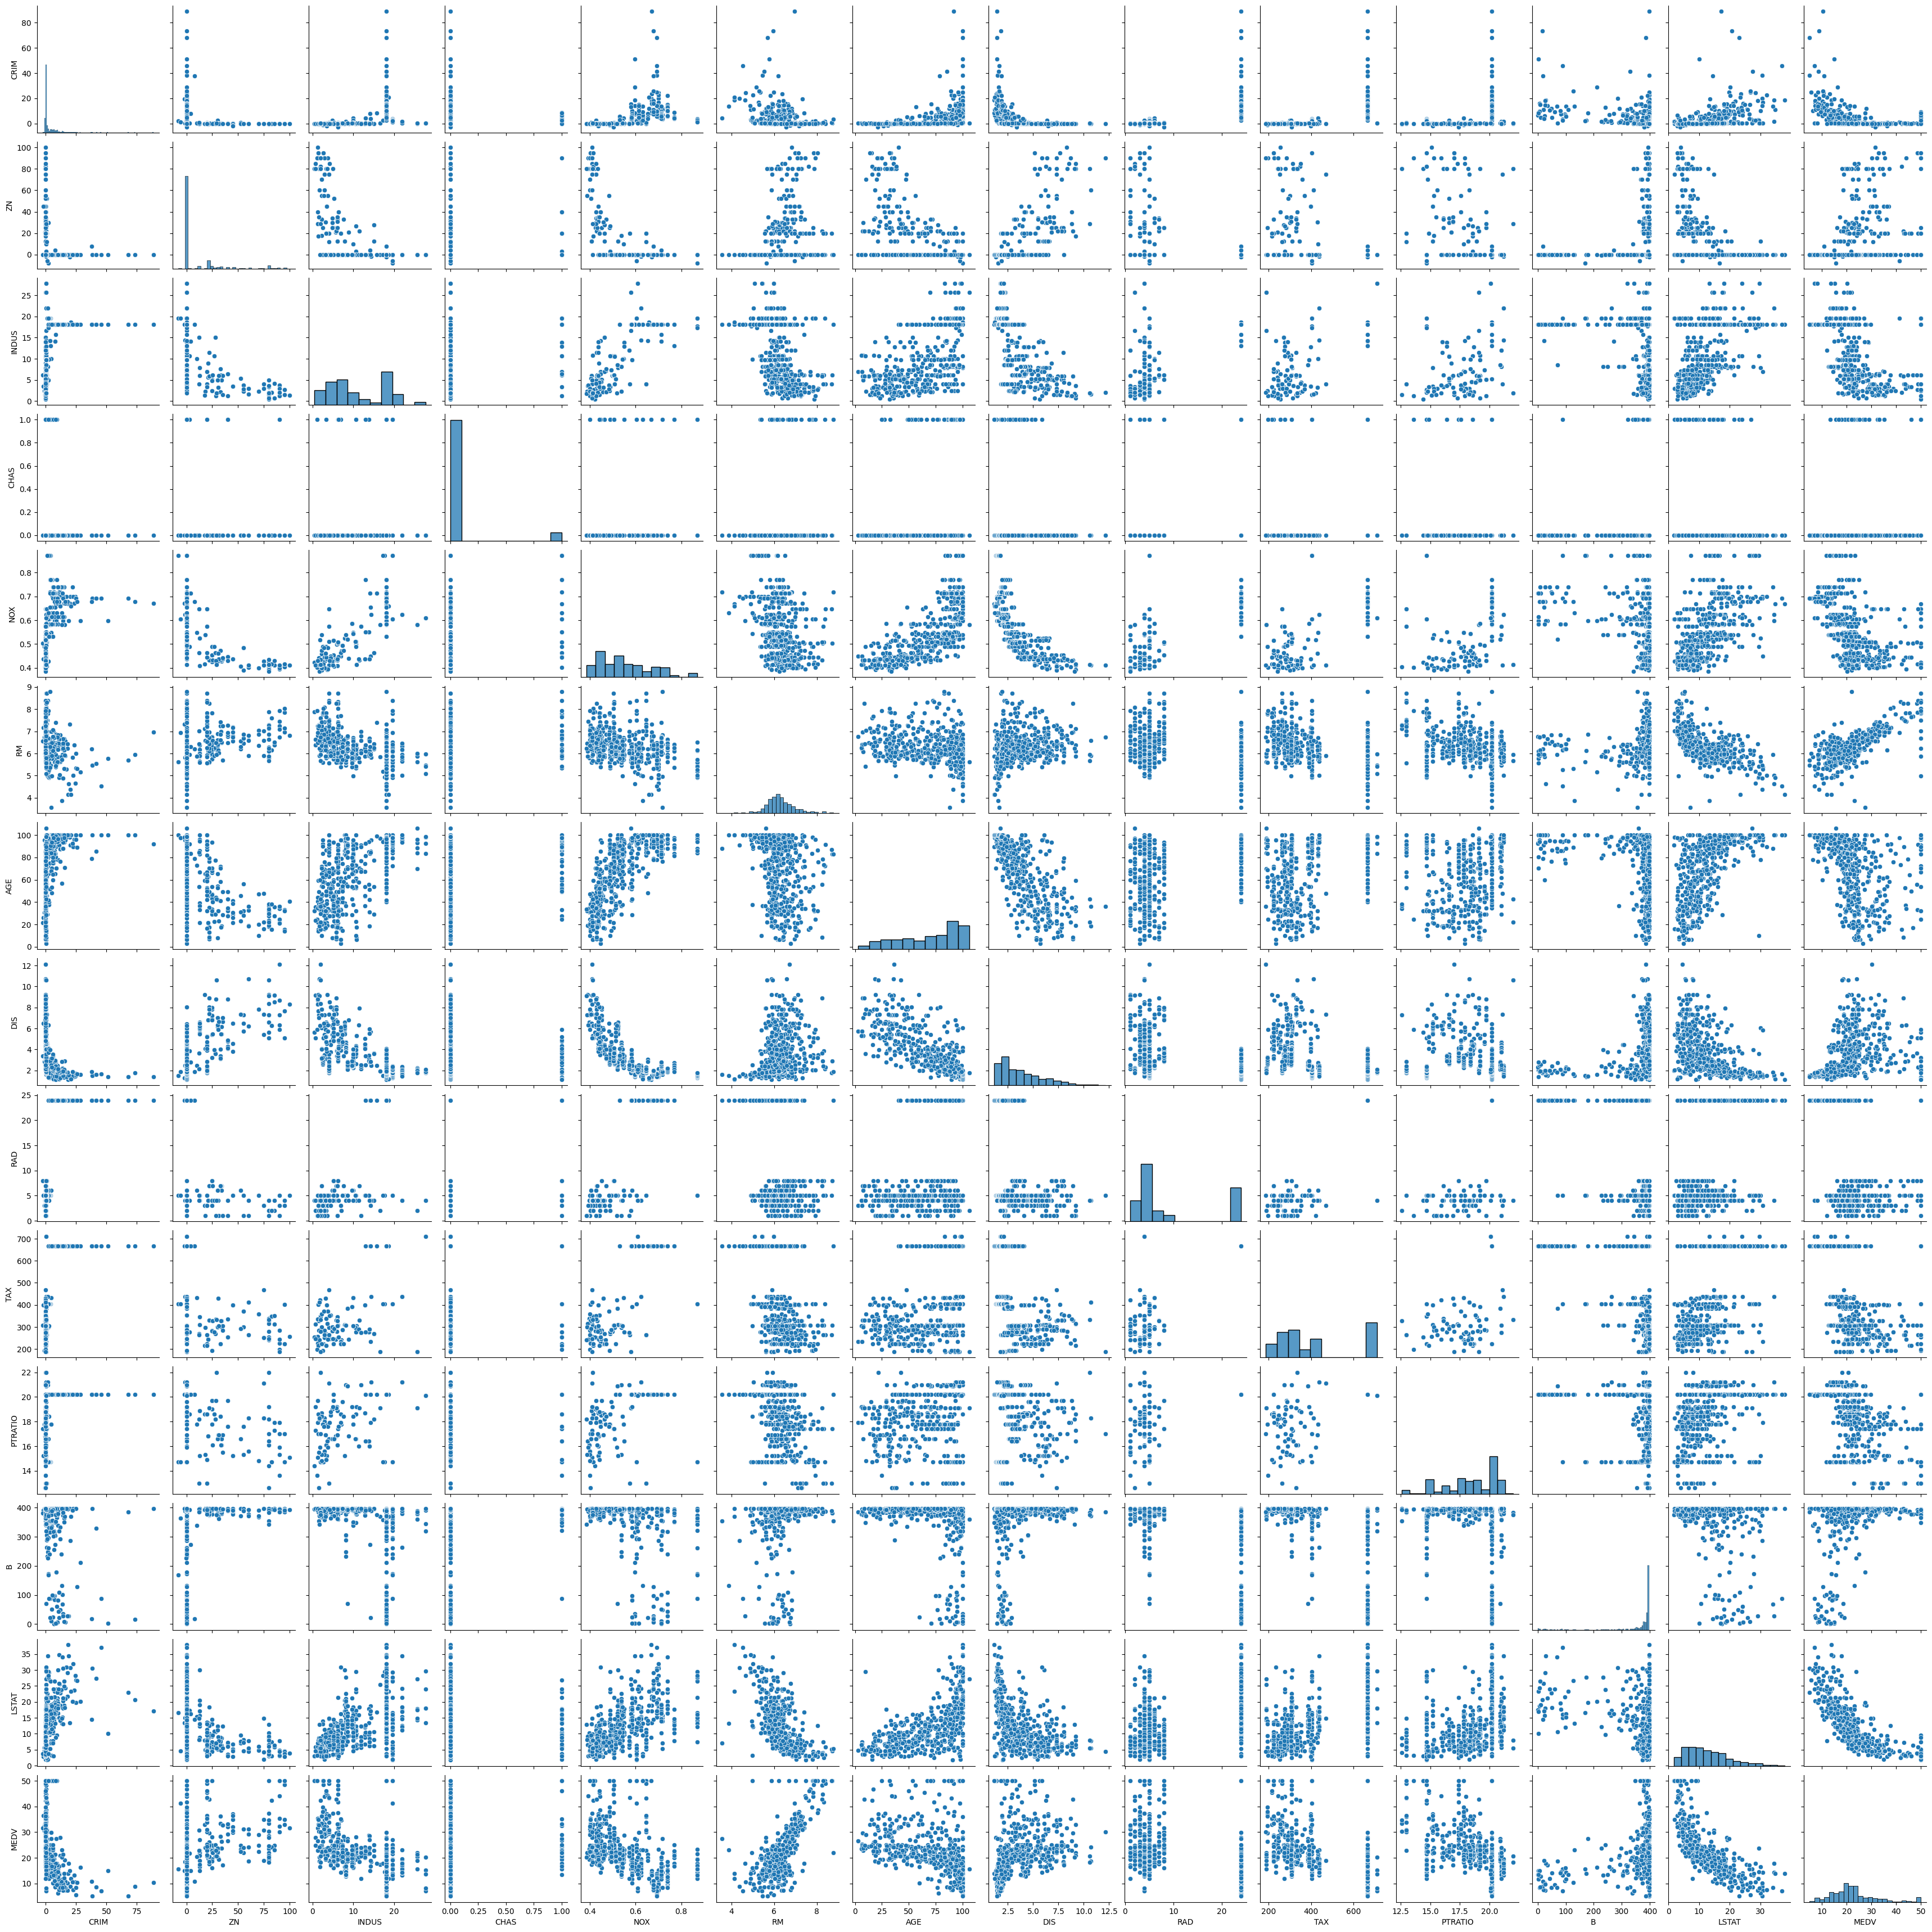

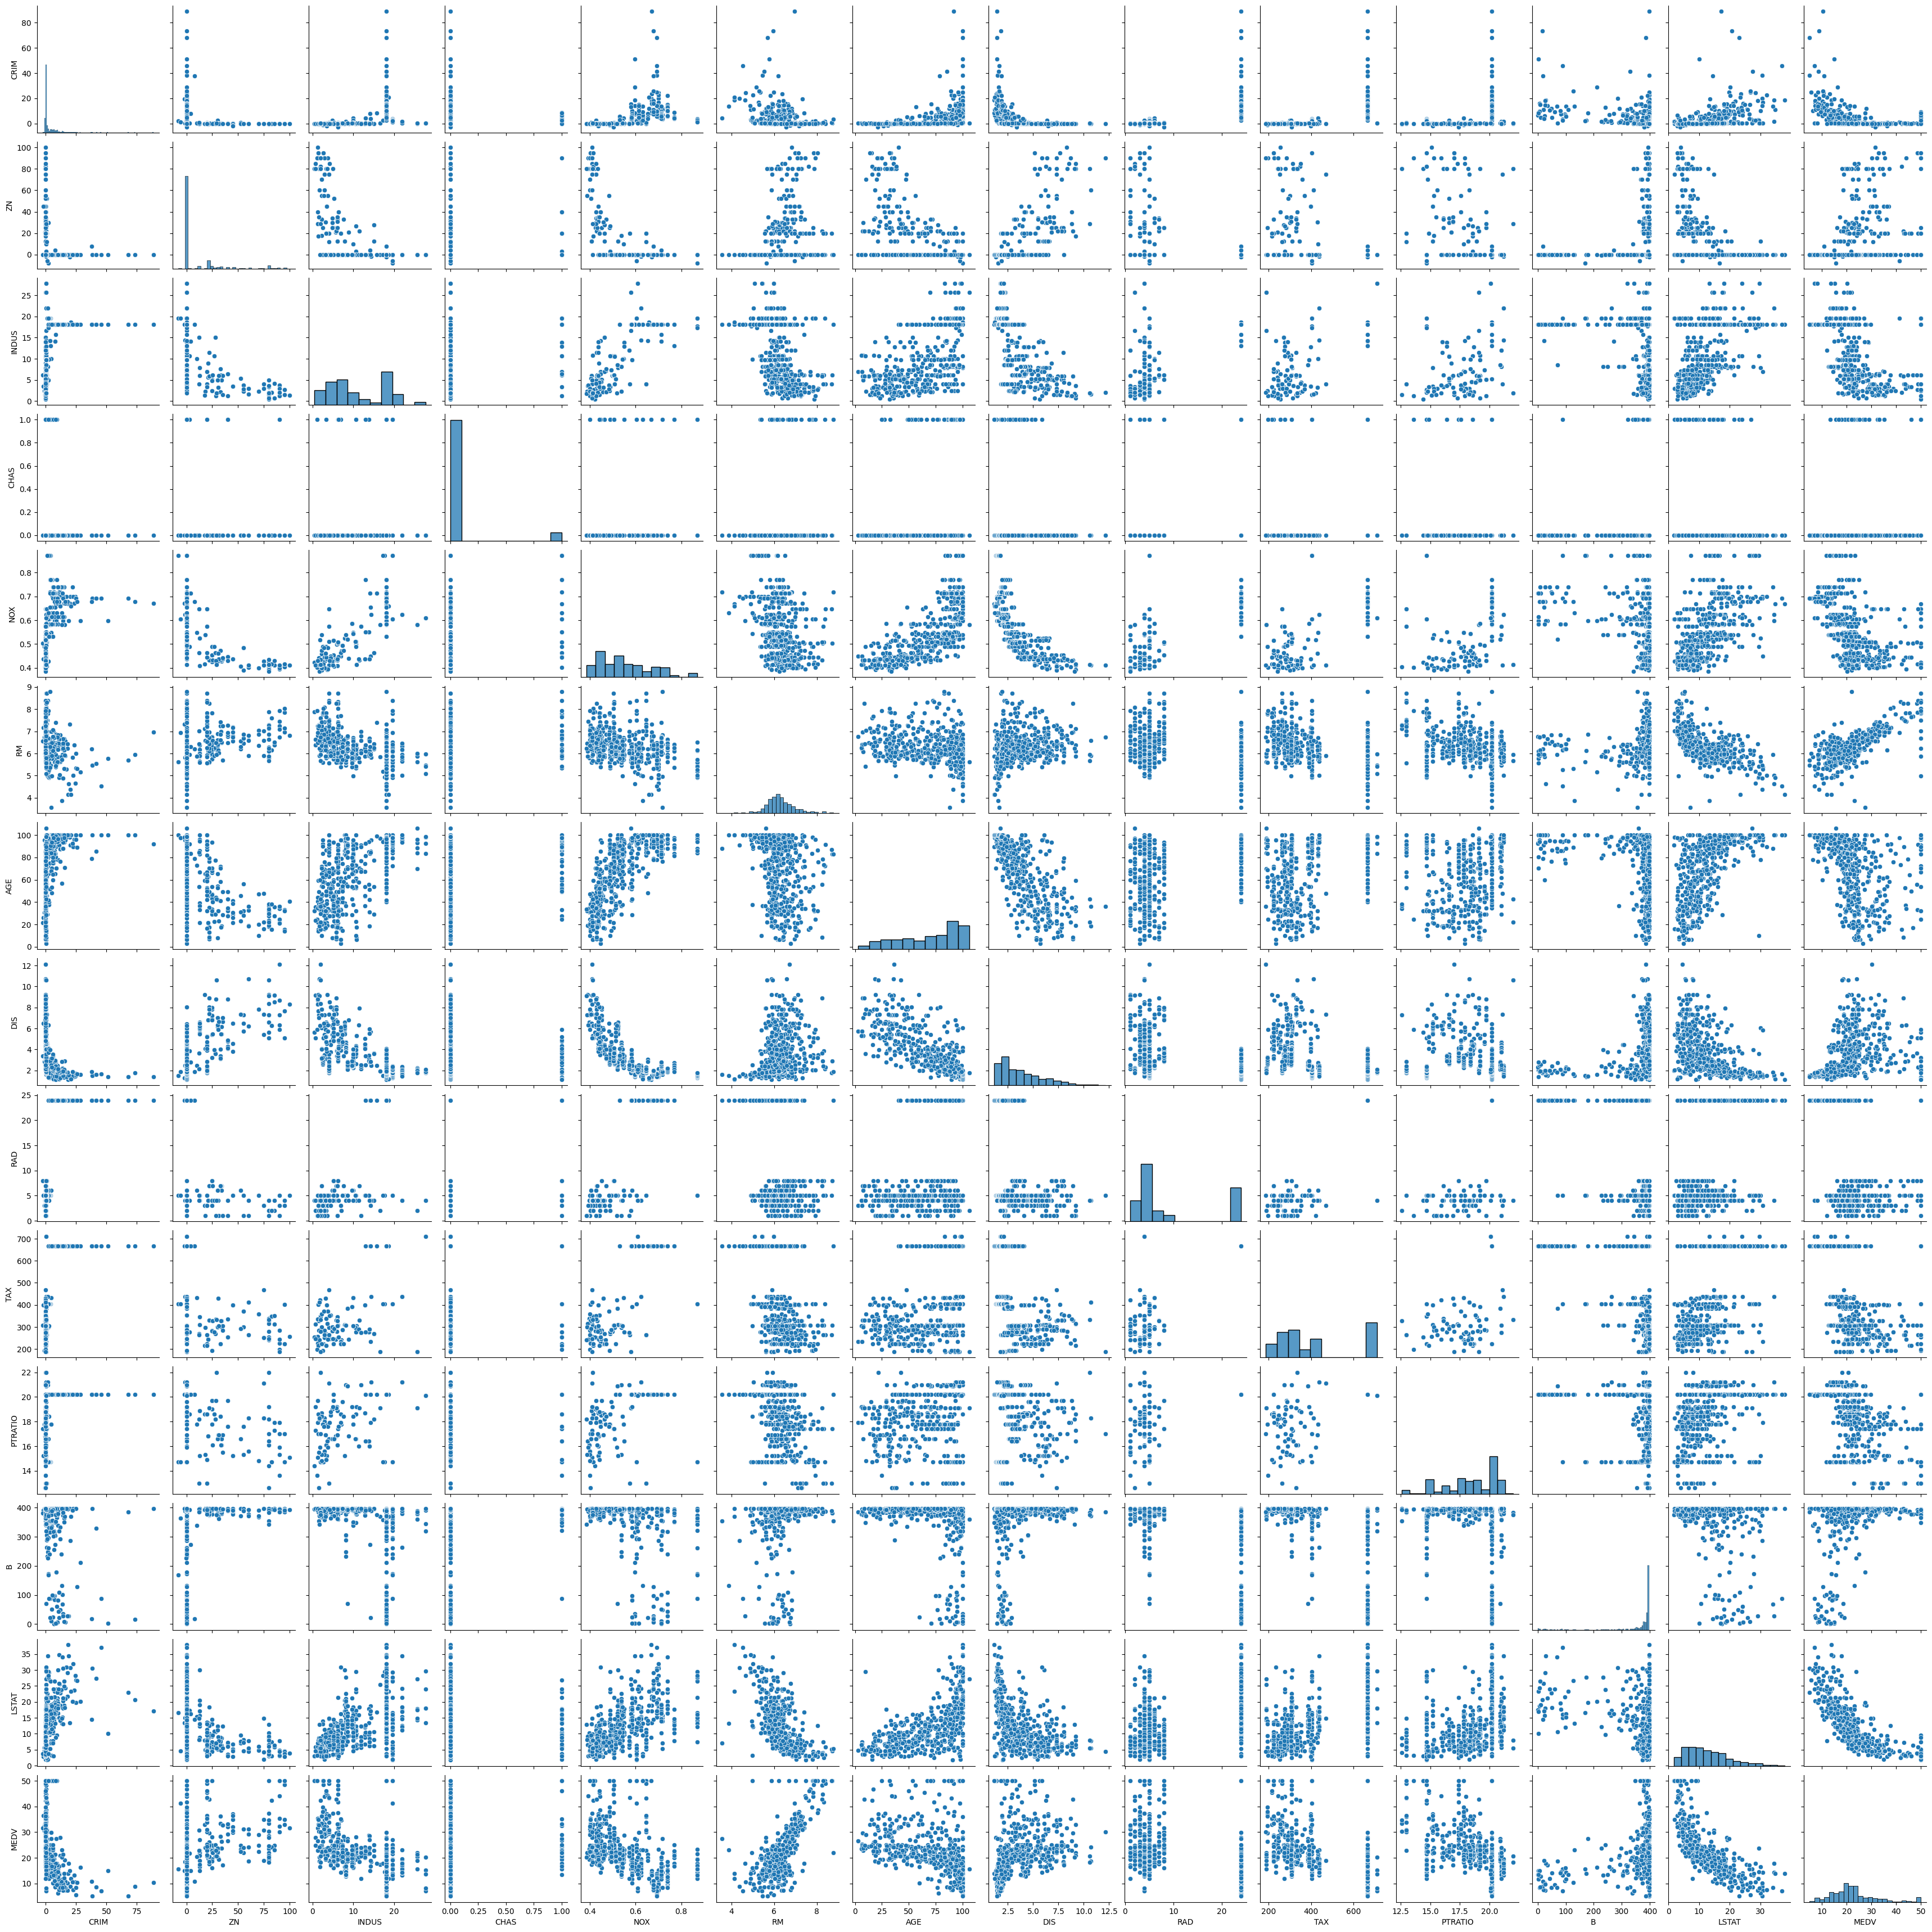

In [30]:
sns.pairplot(boston_df)
plt.show()

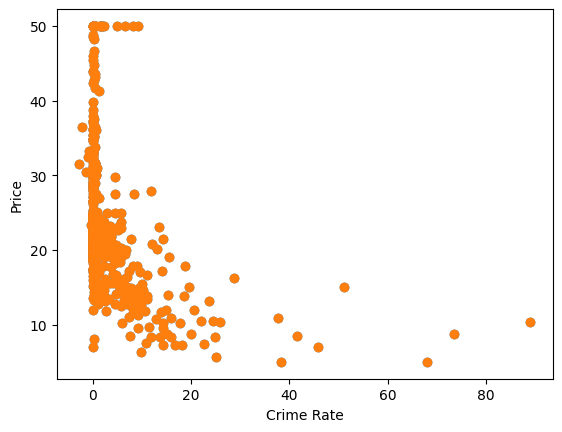

In [34]:
plt.scatter(boston_df['CRIM'], boston_df['MEDV'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.show()

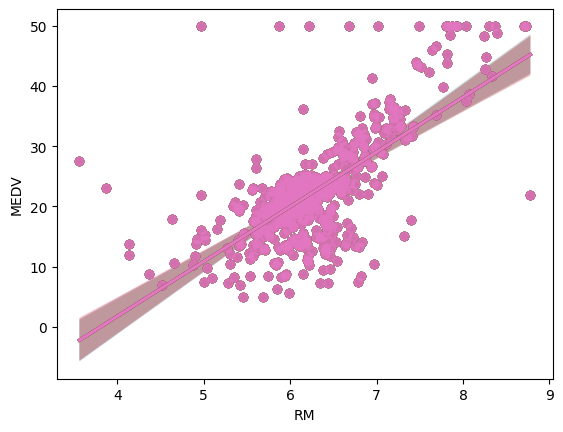

In [42]:
sns.regplot(x="RM", y="MEDV", data= boston_df)
plt.show()

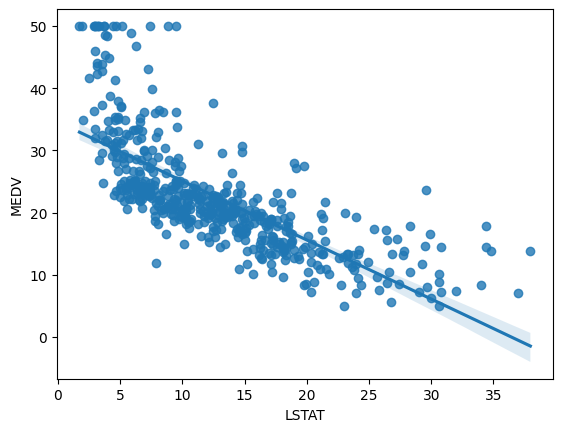

In [43]:
sns.regplot(x="LSTAT", y="MEDV", data= boston_df)
plt.show()

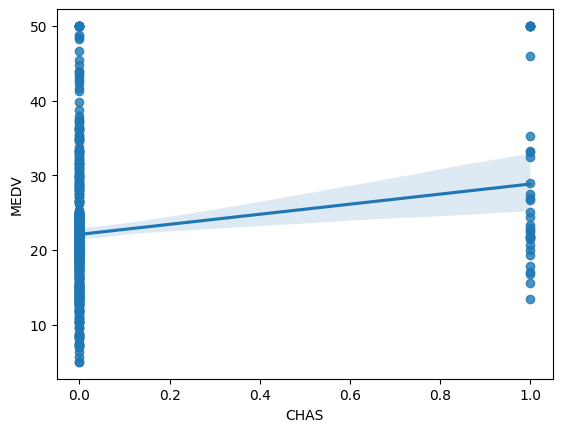

In [44]:
sns.regplot(x="CHAS", y="MEDV", data= boston_df)
plt.show()

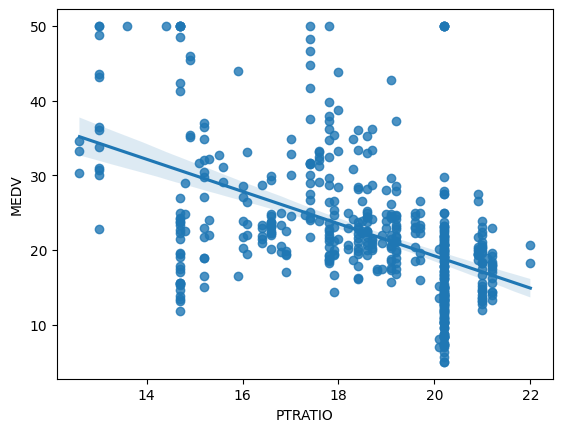

In [45]:
sns.regplot(x="PTRATIO", y="MEDV", data= boston_df)
plt.show()

### Independent and dependent features

In [46]:
X = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]

In [47]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B     LSTAT  
0  396.90  4.980000  
1  396.90  9.140000  
2  392.83  4.030000  
3  394.63  2.940000  
4  396.90  8.458134

In [48]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Train Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [59]:
X_train

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
5     0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
116   0.13158   0.0  10.01   0.0  0.547  6.176  72.5  2.7301    6  432   
45    0.17142   0.0   6.91   0.0  0.448  5.682  33.8  5.1004    3  233   
16    1.05393   0.0   8.14   0.0  0.538  5.935  29.3  4.4986    4  307   
468  15.57570   0.0  18.10   0.0  0.580  5.926  71.0  2.9084   24  666   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56   0.0  0.520  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96   0.0  0.464  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01   0.0  0.435  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10   0.0  0.740  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56   0.0  0.520  6.405  85.4  2.7147    5  384   

     PTRATIO       B      LSTAT  
5       18.7  394.12   5.210000  
116     17.8  393.30  12.225513  
45      17.9  396.90  10.210000  
16      21.0  386.85   6.580000  
468     20.2  368.74  18.130000  
..       ...     ...        ...  
106     20.9  395.67  18.660000  
270     18.6  388.65  13.000000  
348     17.0  390.94   5.990000  
435     20.2  109.85  23.270000  
102     20.9   70.80  10.630000  

[354 rows x 13 columns]

In [60]:
X_test

CRIM    ZN      INDUS  CHAS    NOX     RM         AGE     DIS  RAD  \
173  0.09178   0.0  10.599928   0.0  0.510  6.416   67.140735  2.6463    5   
274  0.05644  40.0   6.410000   1.0  0.447  6.758   32.900000  4.0776    4   
491  0.10574   0.0  27.740000   0.0  0.609  5.983   98.800000  1.8681    4   
72   0.09164   0.0  10.810000   0.0  0.413  6.065    7.800000  5.2873    4   
452  5.09017   0.0  18.100000   0.0  0.713  6.297   91.800000  2.3682   24   
..       ...   ...        ...   ...    ...    ...         ...     ...  ...   
441  9.72418   0.0  18.100000   0.0  0.740  6.406   97.200000  2.0651   24   
23   0.98843   0.0   8.140000   0.0  0.538  5.813  100.000000  4.0952    4   
225  0.52693   0.0   6.200000   0.0  0.504  8.725   83.000000  2.8944    8   
433  5.58107   0.0  18.100000   0.0  0.713  6.436   87.900000  2.3158   24   
447  9.92485   0.0  18.100000   0.0  0.740  6.251   96.600000  2.1980   24   

     TAX  PTRATIO       B      LSTAT  
173  296     16.6  395.50   9.040000  
274  254     17.6  396.90   3.530000  
491  711     20.1  390.11  18.070000  
72   305     19.2  390.91   5.520000  
452  666     20.2  385.09  17.270000  
..   ...      ...     ...        ...  
441  666     20.2  385.96  18.333075  
23   307     21.0  394.54  19.880000  
225  307     17.4  382.00   4.630000  
433  666     20.2  100.19  16.220000  
447  666     20.2  388.52  16.440000  

[152 rows x 13 columns]

## Standardize the dataset

In [61]:
scalar = StandardScaler()

In [62]:
X_train = scalar.fit_transform(X_train)

In [63]:
X_test = scalar.transform(X_test)

## Model Training

In [65]:
regression = LinearRegression()

In [66]:
regression.fit(X_train, y_train)

LinearRegression()

### Print the  coefficients and the intercept

In [67]:
print(regression.coef_)

[-1.10100206  0.78656311  0.18184171  0.89075863 -1.62577885  3.01491472
 -0.63840813 -3.0877648   1.94468232 -1.37838355 -2.01690447  1.01922904
 -3.61914445]


In [68]:
print(regression.intercept_)

23.01581920903955


### On which parameters the model has been trained

In [69]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Prediction with Test Data

In [75]:
y_pred = regression.predict(X_test)

In [76]:
y_pred

array([29.10282598, 36.99409412, 15.22790136, 25.67881491, 18.75864325,
       22.89274864, 17.52656079, 14.25667118, 22.48859244, 20.70079978,
       24.95486218, 18.21849915, -6.6471543 , 21.75119773, 19.01562671,
       24.544003  , 19.90266551,  5.6722969 , 40.64765764, 17.4121448 ,
       28.03566464, 30.39526724, 10.95112421, 22.76297695, 17.89101056,
       15.5053244 , 22.81025897, 14.55323537, 22.54242861, 19.47608033,
       22.05066732, 25.23577732, 25.10925624, 18.10940802, 16.3769458 ,
       17.58148739, 30.8340897 , 20.33108932, 24.33824225, 25.74636763,
       14.22874574, 31.77712008, 42.74488   , 17.71996771, 27.13470413,
       16.9513651 , 13.70085595, 26.48193041, 20.02599613, 30.11687342,
       20.94376626, 34.01844191, 15.60010759, 26.16486692, 39.55612931,
       22.89313148, 18.78874077, 33.16393938, 25.00294269, 12.78219295,
       22.63747993, 30.86295874, 32.43734082, 16.69694301, 20.87377924,
       16.67677234, 20.21326021, 26.30329027, 31.30994011, 11.95

### Scatter plot for prediction

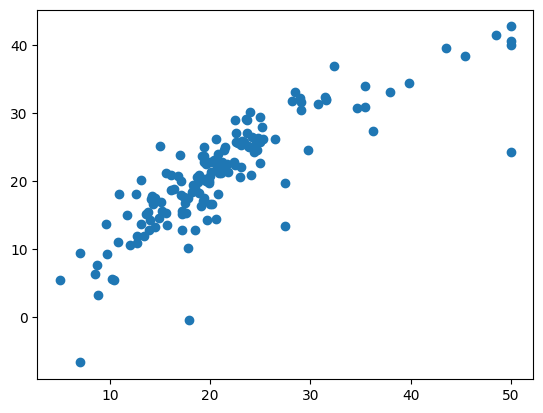

In [77]:
plt.scatter(y_test, y_pred)
plt.show()

### Residuals

In [78]:
residuals = y_test-y_pred

In [80]:
print(residuals)

173    -5.502826
274    -4.594094
491    -1.627901
72     -2.878815
452    -2.658643
         ...    
441    -0.898870
23      1.242170
225    10.045141
433    -2.341228
447    -5.548850
Name: MEDV, Length: 152, dtype: float64


### Plot the residuals 

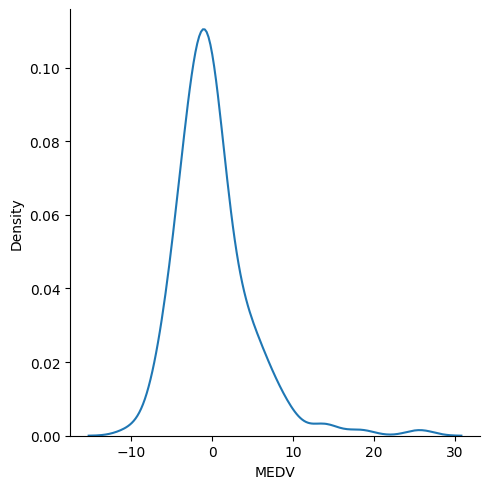

In [87]:
sns.displot(residuals, kind="kde")
plt.show()

### Scatter plot w.r.t. predictions and residuals

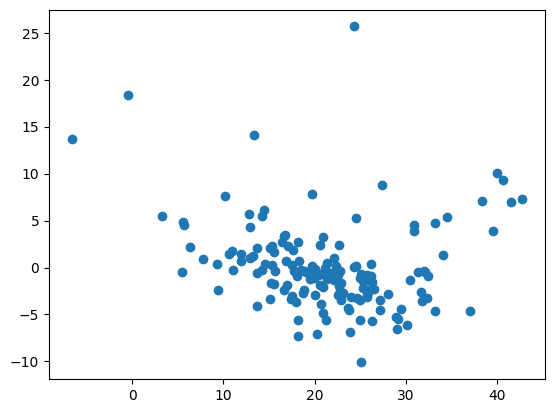

In [88]:
plt.scatter(y_pred, residuals)
plt.show()

## Performance Metrics

In [92]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

21.927658847741004
3.2077752246875106
4.682697817256736


### R square and adjusted R square

In [94]:
score = r2_score(y_test, y_pred)
print(score)

0.7057207369975773


In [96]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6779987774393781

## New Data Prediction

In [99]:
X.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]], shape=(506, 13))

In [101]:
X.values[0].shape

(13,)

In [102]:
X.values[0].reshape(1,-1).shape

(1, 13)

In [103]:
#transformation of new data
scalar.transform(X.values[0].reshape(1,-1))

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4132232 ,  0.28720781, -1.28880799, -0.27565892, -0.16513629,
         0.34715902, -0.13144341,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.06431756]])

In [104]:
regression.predict(scalar.transform(X.values[0].reshape(1,-1)))

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.11687342])

## Pickling the model file for development

In [106]:
import pickle

In [107]:
pickle.dump(regression, open("regression.pkl", "wb"))

In [108]:
pickled_model = pickle.load(open("regression.pkl", "rb"))

### Prediction 

In [109]:
pickled_model.predict(scalar.transform(X.values[0].reshape(1,-1)))

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.11687342])